# 1. Import and Install Dependencies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB 
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [20]:
results.pose_landmarks

landmark {
  x: 0.40538305044174194
  y: 0.41322430968284607
  z: -1.1282631158828735
  visibility: 0.9997721314430237
}
landmark {
  x: 0.43184709548950195
  y: 0.3354690968990326
  z: -1.0529091358184814
  visibility: 0.9995623230934143
}
landmark {
  x: 0.453775018453598
  y: 0.33450281620025635
  z: -1.0526269674301147
  visibility: 0.9995280504226685
}
landmark {
  x: 0.4732399582862854
  y: 0.33515533804893494
  z: -1.051926612854004
  visibility: 0.9994571208953857
}
landmark {
  x: 0.3686097264289856
  y: 0.3436509370803833
  z: -1.0478160381317139
  visibility: 0.9996386170387268
}
landmark {
  x: 0.34915482997894287
  y: 0.34799084067344666
  z: -1.0466139316558838
  visibility: 0.9996634721755981
}
landmark {
  x: 0.33231526613235474
  y: 0.35392656922340393
  z: -1.0466723442077637
  visibility: 0.9996663928031921
}
landmark {
  x: 0.5023541450500488
  y: 0.3745013177394867
  z: -0.596175491809845
  visibility: 0.9994516372680664
}
landmark {
  x: 0.30706626176834106
  y: 0

In [21]:
results.face_landmarks

landmark {
  x: 0.4190889000892639
  y: 0.47111499309539795
  z: -0.04094937816262245
}
landmark {
  x: 0.4181336462497711
  y: 0.4152124226093292
  z: -0.061689343303442
}
landmark {
  x: 0.41703882813453674
  y: 0.4362221956253052
  z: -0.03584495559334755
}
landmark {
  x: 0.4045725166797638
  y: 0.3659709095954895
  z: -0.04187164083123207
}
landmark {
  x: 0.4176561236381531
  y: 0.3980880677700043
  z: -0.06409303843975067
}
landmark {
  x: 0.4162273406982422
  y: 0.3778906762599945
  z: -0.05755269527435303
}
landmark {
  x: 0.4119899272918701
  y: 0.3324741721153259
  z: -0.020040052011609077
}
landmark {
  x: 0.32298141717910767
  y: 0.3444199562072754
  z: 0.017748361453413963
}
landmark {
  x: 0.40981653332710266
  y: 0.2917371392250061
  z: -0.007634641602635384
}
landmark {
  x: 0.40917038917541504
  y: 0.2687923312187195
  z: -0.0071261050179600716
}
landmark {
  x: 0.4057166874408722
  y: 0.19903257489204407
  z: 0.01413650345057249
}
landmark {
  x: 0.41932693123817444


In [22]:
len(results.left_hand_landmarks.landmark)

21

In [7]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
draw_landmarks(frame, results)

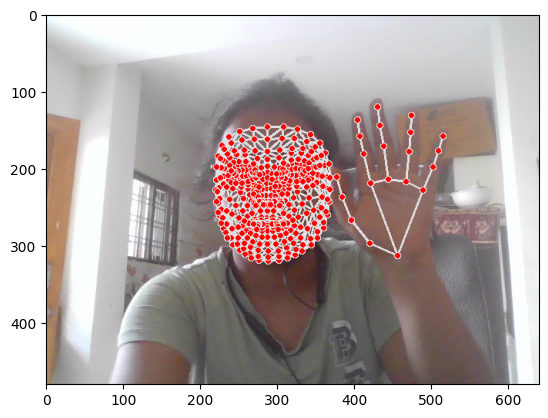

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [16]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
results.right_hand_landmarks.landmark

[x: 0.1880762130022049
y: 0.727444052696228
z: 4.182437294275587e-07
, x: 0.24880117177963257
y: 0.6954443454742432
z: -0.03172386810183525
, x: 0.29433247447013855
y: 0.6210468411445618
z: -0.044277653098106384
, x: 0.3156895041465759
y: 0.5428777933120728
z: -0.05471009388566017
, x: 0.3373691439628601
y: 0.48215627670288086
z: -0.0647997036576271
, x: 0.2757376432418823
y: 0.5069282650947571
z: -0.026264378800988197
, x: 0.2990749478340149
y: 0.4166085422039032
z: -0.04879431426525116
, x: 0.3115062117576599
y: 0.359615683555603
z: -0.06639857590198517
, x: 0.32151198387145996
y: 0.3077206611633301
z: -0.07931241393089294
, x: 0.23452144861221313
y: 0.4874982237815857
z: -0.027076633647084236
, x: 0.24970810115337372
y: 0.3847031891345978
z: -0.04693231359124184
, x: 0.2591104209423065
y: 0.3167431652545929
z: -0.06314916163682938
, x: 0.26610949635505676
y: 0.25840339064598083
z: -0.07505758851766586
, x: 0.1922653764486313
y: 0.49247899651527405
z: -0.03239692747592926
, x: 0.1928

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
pose

array([ 5.00615656e-01,  5.70298016e-01, -7.44646668e-01,  9.99982774e-01,
        5.32807529e-01,  5.07766962e-01, -6.78472579e-01,  9.99956012e-01,
        5.49797773e-01,  5.09853184e-01, -6.78250849e-01,  9.99953926e-01,
        5.65310299e-01,  5.12921870e-01, -6.78324461e-01,  9.99954402e-01,
        4.71422046e-01,  5.10258555e-01, -6.59647644e-01,  9.99957085e-01,
        4.49588001e-01,  5.12902856e-01, -6.58905029e-01,  9.99956548e-01,
        4.30490792e-01,  5.16241908e-01, -6.59062445e-01,  9.99962449e-01,
        5.94854712e-01,  5.57520568e-01, -3.32860410e-01,  9.99957442e-01,
        4.09694254e-01,  5.57273865e-01, -2.15197638e-01,  9.99970913e-01,
        5.35361171e-01,  6.45316303e-01, -6.27133012e-01,  9.99969065e-01,
        4.58906084e-01,  6.44988656e-01, -5.95801651e-01,  9.99972343e-01,
        7.37261295e-01,  9.15014327e-01, -2.02698871e-01,  9.99309599e-01,
        2.96176344e-01,  8.74046862e-01, -1.28821865e-01,  9.99583662e-01,
        8.73741627e-01,  

In [22]:
len(pose)

132

In [31]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    face = np.zeros(1404)


In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.46264005,  0.48612085, -0.65950972, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
468*3+33*4+21*3+21*3

1662

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.46264005,  0.48612085, -0.65950972, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [90]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou',])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [91]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [92]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [46]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [47]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [93]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [94]:
label_map = {label:num for num, label in enumerate(actions)}

In [95]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [96]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [97]:
np.array(sequences).shape

(90, 30, 1662)

In [98]:
np.array(labels).shape

(90,)

In [99]:
X = np.array(sequences)

In [100]:
X.shape

(90, 30, 1662)

In [101]:
y = to_categorical(labels).astype(int)

In [102]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [104]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [126]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [127]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [128]:
res = [.7, 0.2, 0.1]

In [129]:
actions[np.argmax(res)]

'hello'

In [130]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [131]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 121ms/step - loss: 4.9305 - categorical_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 1s 403ms/step - loss: 4.3439 - categorical_accuracy: 0.4235
Epoch 3/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.5093 - categorical_accuracy: 0.4353
Epoch 4/2000
3/3 [==============================] - 0s 131ms/step - loss: 5.7021 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 129ms/step - loss: 5.2874 - categorical_accuracy: 0.4000
Epoch 6/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.1149 - categorical_accuracy: 0.2941
Epoch 7/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.2847 - categorical_accuracy: 0.3412
Epoch 8/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.8445 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 134ms/step - loss: 2.0070 - categorical_accuracy:

KeyboardInterrupt: 

In [132]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# 8. Make Predictions

In [139]:
res = model.predict(X_test)

1/1 [==============================] - 0s 156ms/step


In [142]:
actions[np.argmax(res[2])]

'hello'

In [143]:
actions[np.argmax(y_test[2])]

'thanks'

9. Save Weights

In [144]:
model.save('action.h5')

 10. Evaluation using Confusion Matrix and Accuracy 

In [150]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [151]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 71ms/step


In [152]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [153]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 3],
        [1, 0]],

       [[2, 0],
        [2, 1]],

       [[3, 1],
        [1, 0]]], dtype=int64)

In [154]:
accuracy_score(ytrue, yhat)

0.2

# 11. Test in Real Time

In [155]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

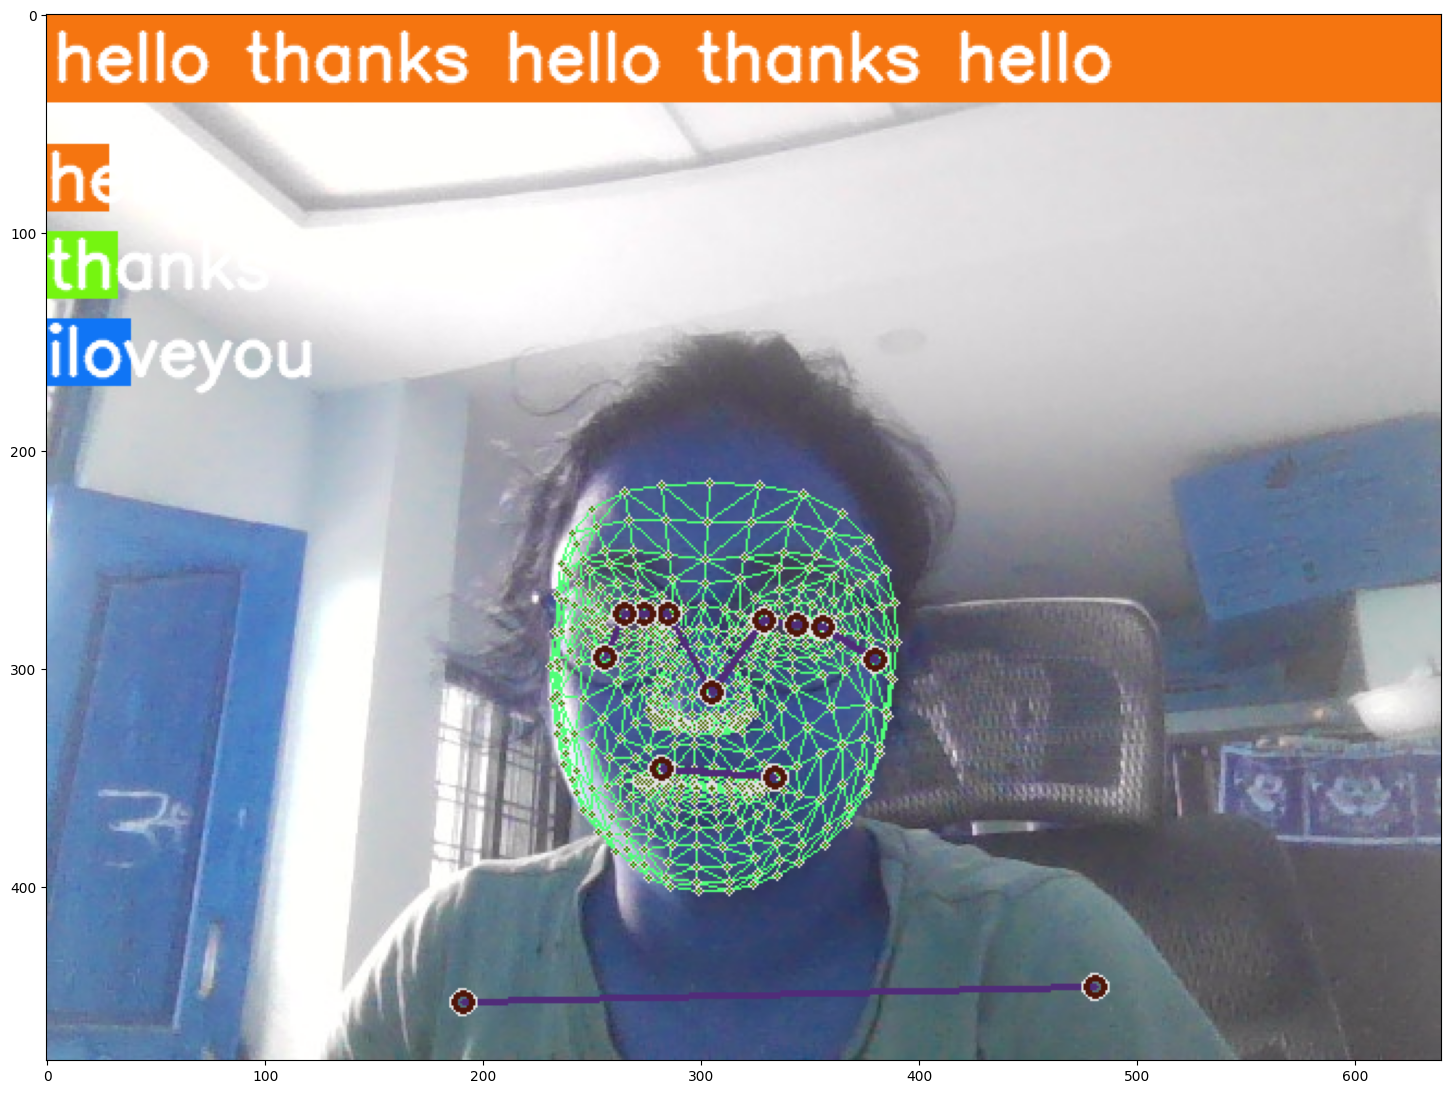

In [163]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [157]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [158]:
len(sequence)

TypeError: object of type 'int' has no len()

In [159]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [162]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [167]:
cap.release()
cv2.destroyAllWindows()

In [168]:
res[np.argmax(res)] > threshold

False

In [169]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [170]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 97ms/step


array([[0.403864  , 0.33539626, 0.26073974]], dtype=float32)